In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
# Define your data directories
data_dir = 'C:/Users/luv05/projects/proj_leaf_1/leaf_data'  # Replace with the root directory of your dataset

# Set the root directory for the training, validation, and test data
train_dir = 'C:/Users/luv05/projects/proj_leaf_1/leaf_data_split/train'
validation_dir = 'C:/Users/luv05/projects/proj_leaf_1/leaf_data_split/valid'
test_dir = 'C:/Users/luv05/projects/proj_leaf_1/leaf_data_split/test'

image_size = (224, 224)
batch_size = 32
num_classes = 11  # Number of classes (types of leaves) in your dataset

In [3]:
# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)


Found 1587 images belonging to 11 classes.
Found 456 images belonging to 11 classes.
Found 233 images belonging to 11 classes.


In [4]:
# Define your CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # You can adjust the number of epochs
    validation_data=validation_generator,
)

Epoch 1/10
50/50 [==============================] - 203s 4s/step - loss: 2.2973 - accuracy: 0.2754 - val_loss: 1.7667 - val_accuracy: 0.3355
Epoch 2/10
50/50 [==============================] - 182s 4s/step - loss: 1.4367 - accuracy: 0.4934 - val_loss: 1.2499 - val_accuracy: 0.5943
Epoch 3/10
50/50 [==============================] - 179s 4s/step - loss: 1.0668 - accuracy: 0.6427 - val_loss: 1.0163 - val_accuracy: 0.6711
Epoch 4/10
50/50 [==============================] - 181s 4s/step - loss: 0.9120 - accuracy: 0.6950 - val_loss: 0.7337 - val_accuracy: 0.7785
Epoch 5/10
50/50 [==============================] - 181s 4s/step - loss: 0.7657 - accuracy: 0.7473 - val_loss: 0.9477 - val_accuracy: 0.7018
Epoch 6/10
50/50 [==============================] - 187s 4s/step - loss: 0.7329 - accuracy: 0.7524 - val_loss: 0.8391 - val_accuracy: 0.7149
Epoch 7/10
50/50 [==============================] - 186s 4s/step - loss: 0.6310 - accuracy: 0.7971 - val_loss: 0.5910 - val_accuracy: 0.8048
Epoch 8/10
50

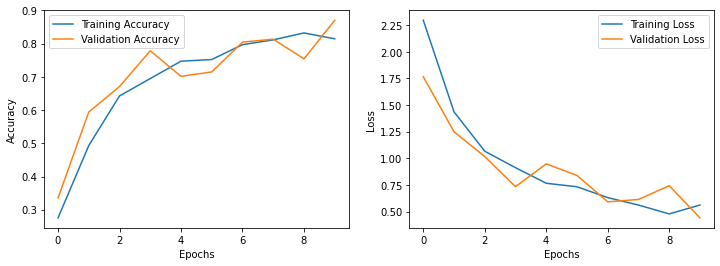

In [8]:
# Plot accuracy and loss graphs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [9]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

# Print test accuracy
print(f'Test Accuracy: {test_accuracy:.4f}')

8/8 [==============================] - 21s 3s/step - loss: 0.5154 - accuracy: 0.8369
Test Accuracy: 0.8369


In [10]:
model.save('C:/Users/luv05/projects/proj_leaf_1/CNN_MODEL')

INFO:tensorflow:Assets written to: C:/Users/luv05/projects/proj_leaf_1/CNN_MODEL\assets


In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os

# Load the saved model
saved_model_path = 'C:/Users/luv05/projects/proj_leaf_1/CNN_MODEL'  # Replace with the path to your saved model
loaded_model = tf.keras.models.load_model(saved_model_path)

# Create a function to preprocess an image before passing it to the model
def preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  # Normalize the image

    return img

# Define the path to your test directory
test_directory = 'C:/Users/luv05/projects/proj_leaf_1/leaf_data_split/test'  # Replace with the path to your test directory

# Get a list of all subdirectories (classes) in the test directory
class_names = os.listdir(test_directory)

# Iterate through each subdirectory (class)
for class_name in class_names:
    class_directory = os.path.join(test_directory, class_name)
    
    # Get a list of all image files in the class directory
    image_files = [os.path.join(class_directory, file) for file in os.listdir(class_directory) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    # Make predictions for each image
    for image_path in image_files:
        preprocessed_image = preprocess_image(image_path)
        predictions = loaded_model.predict(preprocessed_image)
        predicted_class_index = np.argmax(predictions)
        predicted_class = class_names[predicted_class_index]
        
        print(f"Image: {image_path}, Predicted class: {predicted_class}")


Image: C:/Users/luv05/projects/proj_leaf_1/leaf_data_split/test\Alstonia Scholaris (P2)\0003_0031.JPG, Predicted class: Alstonia Scholaris (P2)
Image: C:/Users/luv05/projects/proj_leaf_1/leaf_data_split/test\Alstonia Scholaris (P2)\0003_0035.JPG, Predicted class: Alstonia Scholaris (P2)
Image: C:/Users/luv05/projects/proj_leaf_1/leaf_data_split/test\Alstonia Scholaris (P2)\0003_0038.JPG, Predicted class: Alstonia Scholaris (P2)
Image: C:/Users/luv05/projects/proj_leaf_1/leaf_data_split/test\Alstonia Scholaris (P2)\0003_0052.JPG, Predicted class: Alstonia Scholaris (P2)
Image: C:/Users/luv05/projects/proj_leaf_1/leaf_data_split/test\Alstonia Scholaris (P2)\0003_0057.JPG, Predicted class: Jatropha (P6)
Image: C:/Users/luv05/projects/proj_leaf_1/leaf_data_split/test\Alstonia Scholaris (P2)\0003_0060.JPG, Predicted class: Alstonia Scholaris (P2)
Image: C:/Users/luv05/projects/proj_leaf_1/leaf_data_split/test\Alstonia Scholaris (P2)\0003_0072.JPG, Predicted class: Alstonia Scholaris (P2)
Im

Image: C:/Users/luv05/projects/proj_leaf_1/leaf_data_split/test\Chinar (P11)\0011_0064.JPG, Predicted class: Chinar (P11)
Image: C:/Users/luv05/projects/proj_leaf_1/leaf_data_split/test\Chinar (P11)\0011_0086.JPG, Predicted class: Jatropha (P6)
Image: C:/Users/luv05/projects/proj_leaf_1/leaf_data_split/test\Chinar (P11)\0011_0099.JPG, Predicted class: Chinar (P11)
Image: C:/Users/luv05/projects/proj_leaf_1/leaf_data_split/test\Gauva (P3)\0004_0007.JPG, Predicted class: Gauva (P3)
Image: C:/Users/luv05/projects/proj_leaf_1/leaf_data_split/test\Gauva (P3)\0004_0020.JPG, Predicted class: Pongamia Pinnata (P7)
Image: C:/Users/luv05/projects/proj_leaf_1/leaf_data_split/test\Gauva (P3)\0004_0029.JPG, Predicted class: Gauva (P3)
Image: C:/Users/luv05/projects/proj_leaf_1/leaf_data_split/test\Gauva (P3)\0004_0037.JPG, Predicted class: Gauva (P3)
Image: C:/Users/luv05/projects/proj_leaf_1/leaf_data_split/test\Gauva (P3)\0004_0045.JPG, Predicted class: Jatropha (P6)
Image: C:/Users/luv05/project

Image: C:/Users/luv05/projects/proj_leaf_1/leaf_data_split/test\Jatropha (P6)\0006_0128.JPG, Predicted class: Jatropha (P6)
Image: C:/Users/luv05/projects/proj_leaf_1/leaf_data_split/test\Jatropha (P6)\0006_0129.JPG, Predicted class: Lemon (P10)
Image: C:/Users/luv05/projects/proj_leaf_1/leaf_data_split/test\Jatropha (P6)\0006_0131.JPG, Predicted class: Basil healthy (P8)
Image: C:/Users/luv05/projects/proj_leaf_1/leaf_data_split/test\Lemon (P10)\0010_0011.JPG, Predicted class: Lemon (P10)
Image: C:/Users/luv05/projects/proj_leaf_1/leaf_data_split/test\Lemon (P10)\0010_0015.JPG, Predicted class: Lemon (P10)
Image: C:/Users/luv05/projects/proj_leaf_1/leaf_data_split/test\Lemon (P10)\0010_0017.JPG, Predicted class: Lemon (P10)
Image: C:/Users/luv05/projects/proj_leaf_1/leaf_data_split/test\Lemon (P10)\0010_0019.JPG, Predicted class: Lemon (P10)
Image: C:/Users/luv05/projects/proj_leaf_1/leaf_data_split/test\Lemon (P10)\0010_0026.JPG, Predicted class: Lemon (P10)
Image: C:/Users/luv05/pro

Image: C:/Users/luv05/projects/proj_leaf_1/leaf_data_split/test\Pongamia Pinnata (P7)\0007_0019.JPG, Predicted class: Pongamia Pinnata (P7)
Image: C:/Users/luv05/projects/proj_leaf_1/leaf_data_split/test\Pongamia Pinnata (P7)\0007_0025.JPG, Predicted class: Pongamia Pinnata (P7)
Image: C:/Users/luv05/projects/proj_leaf_1/leaf_data_split/test\Pongamia Pinnata (P7)\0007_0028.JPG, Predicted class: Pongamia Pinnata (P7)
Image: C:/Users/luv05/projects/proj_leaf_1/leaf_data_split/test\Pongamia Pinnata (P7)\0007_0033.JPG, Predicted class: Jatropha (P6)
Image: C:/Users/luv05/projects/proj_leaf_1/leaf_data_split/test\Pongamia Pinnata (P7)\0007_0049.JPG, Predicted class: Arjun (P1)
Image: C:/Users/luv05/projects/proj_leaf_1/leaf_data_split/test\Pongamia Pinnata (P7)\0007_0061.JPG, Predicted class: Pongamia Pinnata (P7)
Image: C:/Users/luv05/projects/proj_leaf_1/leaf_data_split/test\Pongamia Pinnata (P7)\0007_0072.JPG, Predicted class: Pongamia Pinnata (P7)
Image: C:/Users/luv05/projects/proj_lea